<a href="https://colab.research.google.com/github/spiralarchitect5/ProdInfo_Task_1/blob/main/Task1_Lregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("train.csv")

In [ ]:
features = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target = df['SalePrice']

In [ ]:
if features.isnull().sum().sum() > 0 or target.isnull().sum() > 0:
    print("Missing values found. Please handle missing data.")
else:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

📈 Model Evaluation:
Mean Squared Error (MSE): 2806426667.25
R² Score: 0.6341

📌 Feature Coefficients:
               Coefficient
GrLivArea       104.026307
BedroomAbvGr -26655.165357
FullBath      30014.324109


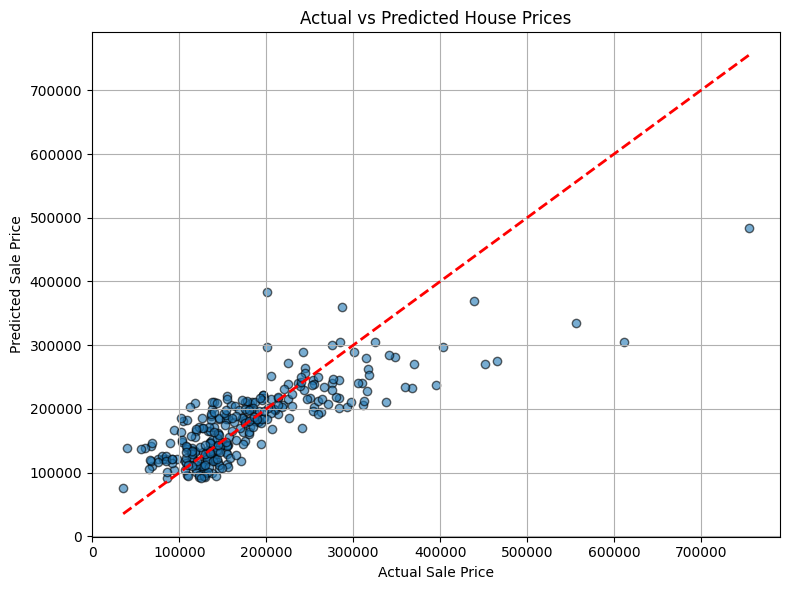

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📈 Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

coeff_df = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print("\n📌 Feature Coefficients:")
print(coeff_df)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()